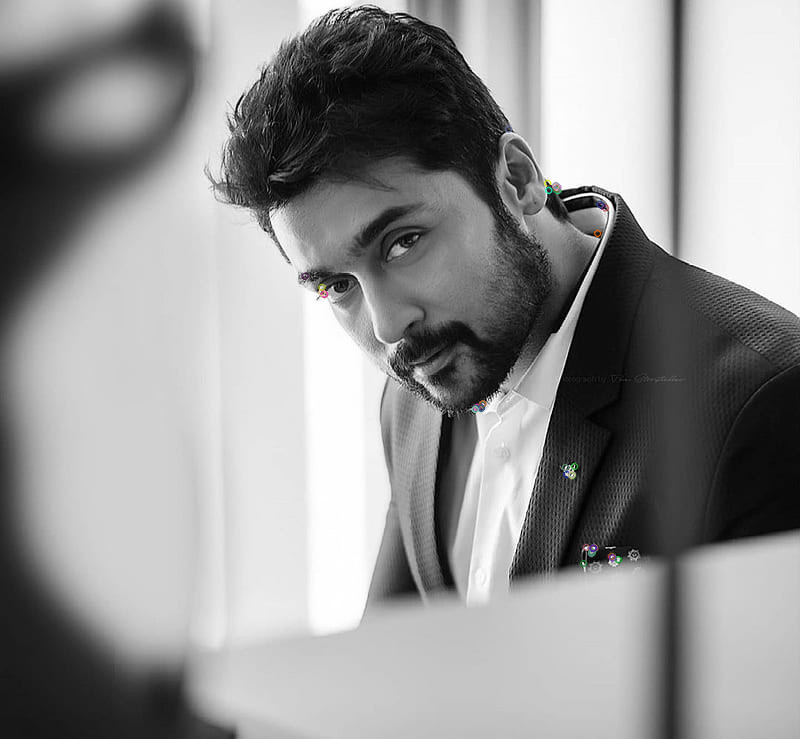

In [19]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

im1 = cv2.imread("/content/suriya.jpg")
im2 = cv2.imread("/content/HD-wallpaper-surya-handsome-king.jpg")

img1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(50)

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

img3 = cv2.drawKeypoints(img1, kp1, None, flags=None)
img4 = cv2.drawKeypoints(img2, kp1, None, flags=None)

cv2_imshow(img3)

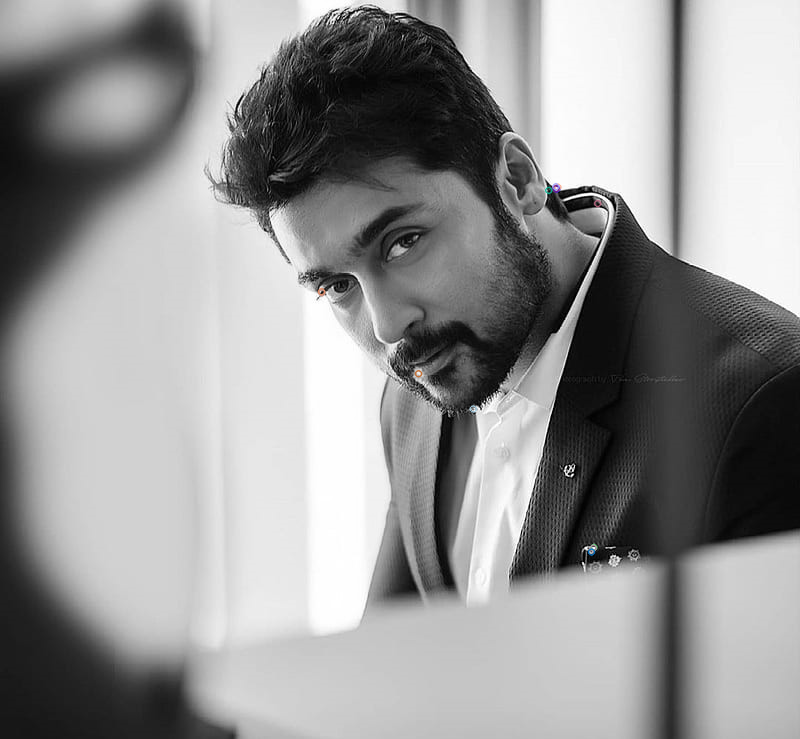

In [10]:
cv2_imshow(img4)

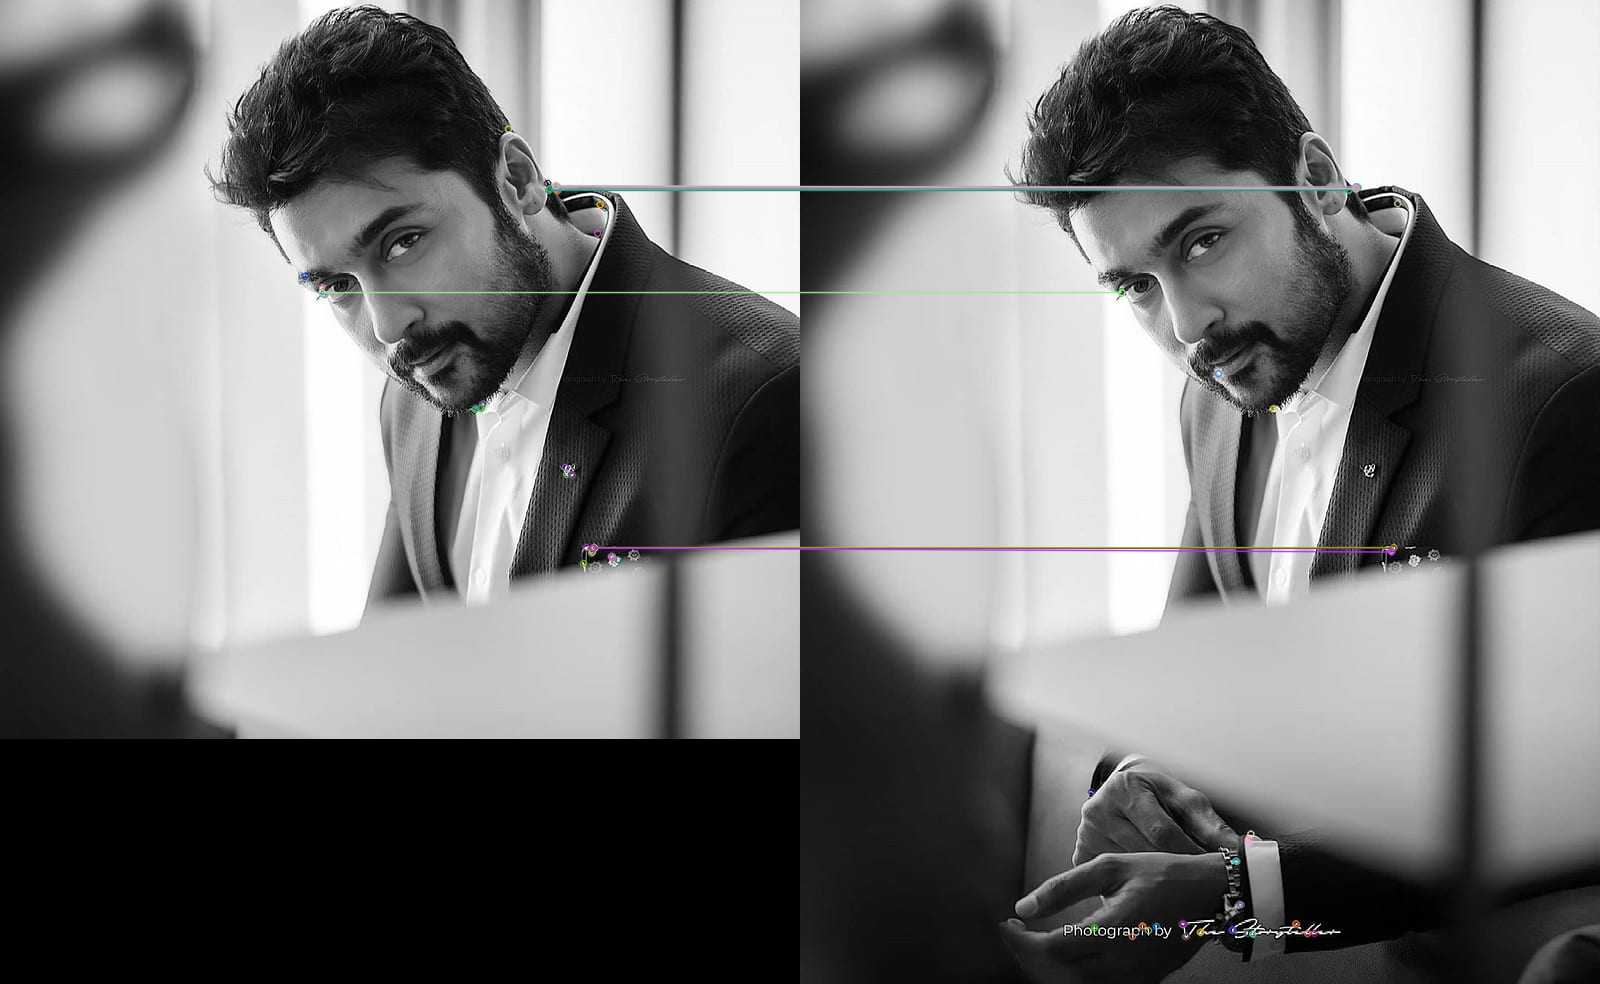

In [20]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(des1, des2, None)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(img1,kp1, img2, kp2, matches[:10], None)

cv2_imshow(img3)

In [21]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
   points1[i, :] = kp1[match.queryIdx].pt
   points2[i, :] = kp2[match.trainIdx].pt

h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
height, width, channels = im2.shape
im1Reg = cv2.warpPerspective(im1, h, (width, height))


In [22]:
print("Estimated homography : \n",  h)

Estimated homography : 
 [[-2.82265615e+00  1.02276066e+00  5.87649226e+02]
 [-8.99085133e-01  3.24491353e-01  1.72053008e+02]
 [-4.95377560e-03  1.78026801e-03  1.00000000e+00]]


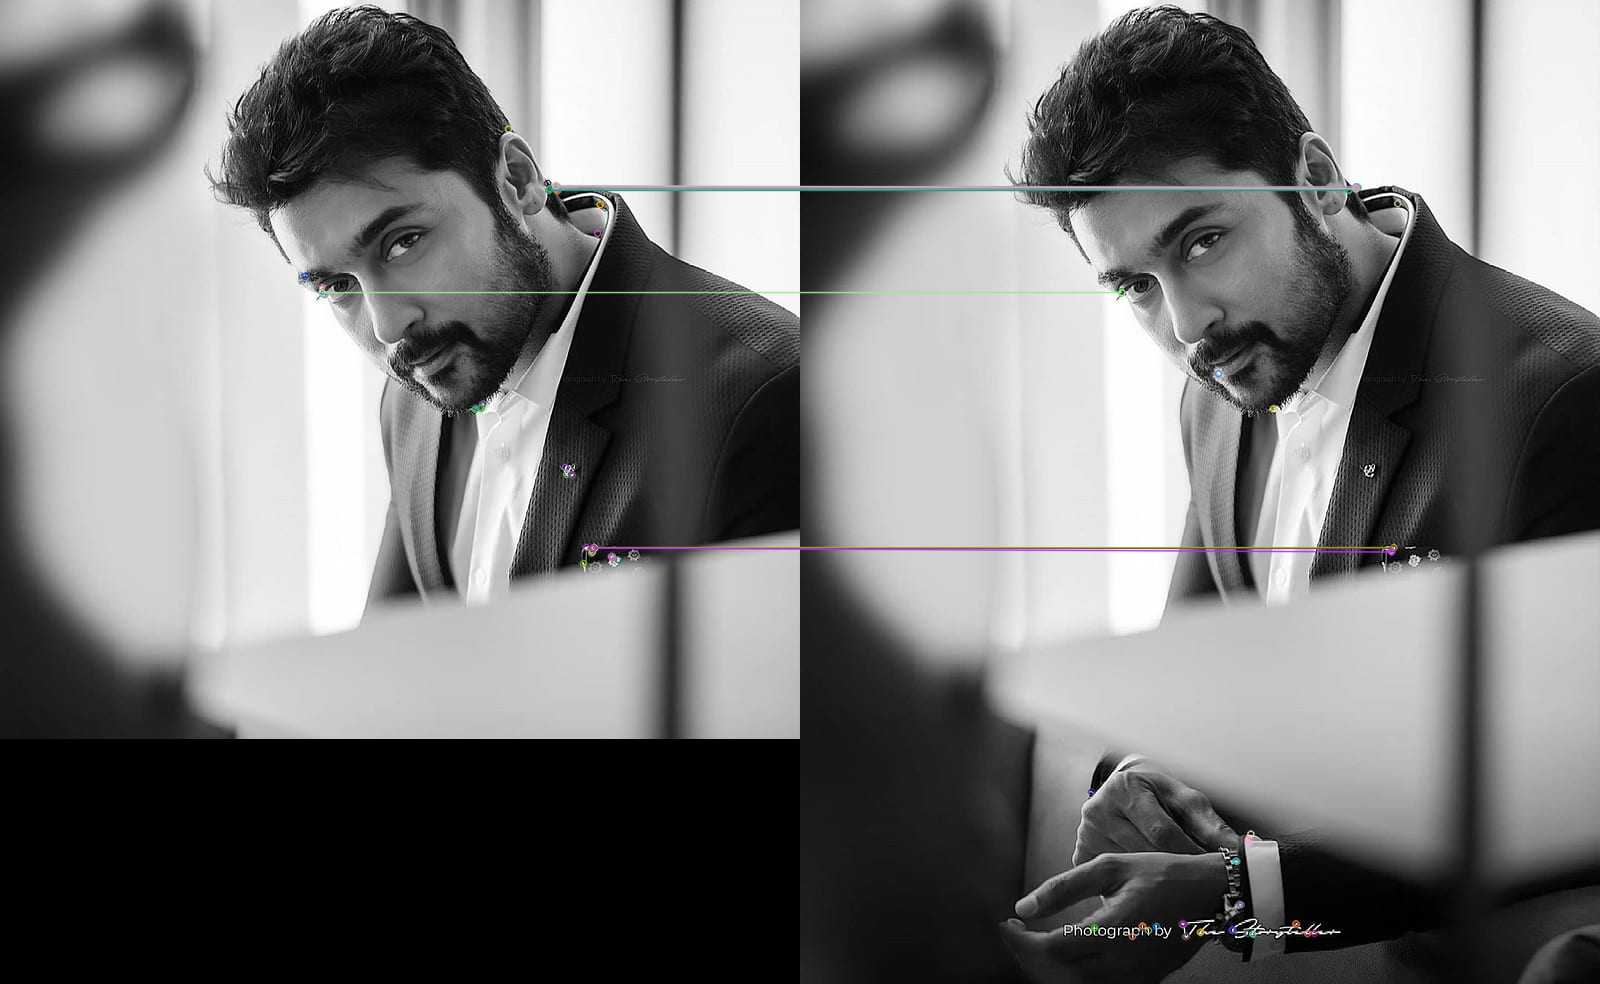

In [23]:
cv2_imshow(img3)

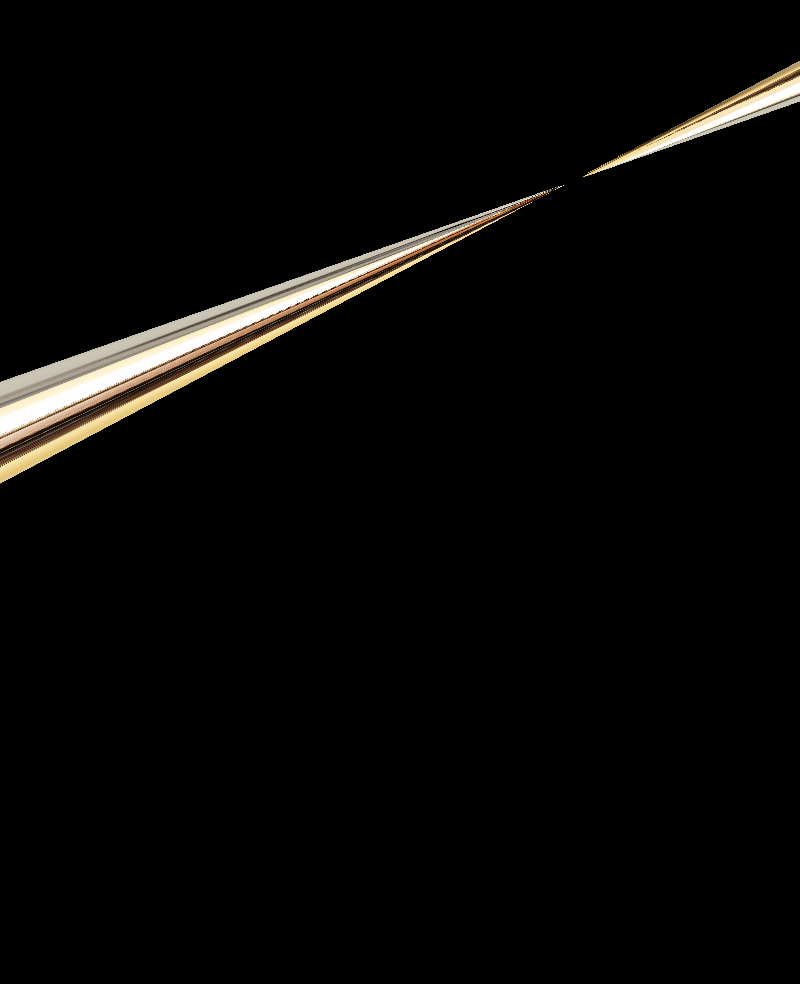

In [24]:
cv2_imshow(im1Reg)